# Ejercicio 1 - Preguntas Teóricas

## Ejercicio 1.1 
https://www.plandemejora.com/como-plantear-un-problema-de-programacion-lineal/

Investigue y responda a las siguientes preguntas
1. ¿Cómo definiría “Programación Lineal”?
   * La programación lineal es una técnica matemática que se utiliza para optimizar el rendimiento o la eficiencia de un sistema.
2. ¿Cuáles son los escenarios típicos y los problemas del mundo real que se pueden modelar mediante la
programación lineal?
   * Planificación de producción y asignación de recursos.
   * Asignación de personal y horaiirios.
   * Distribución de productos.
   * Planificación de la cadena de suministro.
3. ¿Cómo contribuye la programación lineal a la toma de decisiones en diversas industrias, como la
fabricación, el transporte, las finanzas y la asignación de recursos?
   * La programación lineal ayuda a las empresas a optimizar sus recursos, aumentar sus ganancias y reducir sus costos.

## Ejercicio 1.2
Investigue y responda a las siguientes preguntas
1. ¿Cómo definiría los componentes clave de un problema de programación lineal: función objetivo, variables
de decisión y restricciones?
    * Función objetivo: Es la función que se desea maximizar o minimizar.
    * Variables de decisión: Son las variables que están bajo el control de la persona que toma las decisiones. Los valores óptimos se obtienen al resolver el problema de programación lineal.
    * Restricciones: Son las limitaciones que se tienen para obtener el resultado deseado.
    Tambien hay constantes que son los valores que no se pueden cambiar.
2. ¿Cómo se formula matemáticamente un problema de programación lineal?
    * Se representan en forma de ecuaciones lineales. 
3. ¿Cuál es la interpretación geométrica de un problema de programación lineal en dos dimensiones?
    * Se llama la region factible y es el conjunto de puntos que satisfacen todas las restricciones.
4. ¿Cómo se relacionan las regiones factibles, las soluciones óptimas y los puntos de esquina en la
programación lineal?
    * La región factible es el conjunto de puntos que satisfacen todas las restricciones. La solución óptima es el punto de la región factible que maximiza o minimiza la función objetivo. Los puntos de esquina son los puntos extremos de la región factible.
5. ¿Qué es el método gráfico y cuándo es adecuado para resolver problemas de programación lineal?
    * Es una téctica que se usa para resolver problemas de programación lineal. Se representa geométricamente la región factible y se encuentra la solución óptima.


# Ejercicio 2 - Preguntas Prácticas

## Ejercicio 2.1
Usted es el gerente de una fábrica que produce dos tipos de productos: A y B. La fábrica tiene recursos limitados,
incluidas las horas de trabajo y las materias primas. Su objetivo es maximizar las ganancias mientras satisface la
demanda de ambos productos.
Para eso usted recolecta los siguientes datos:
* El producto A requiere 2 horas de mano de obra y 3 unidades de materia prima por unidad.
* El producto B requiere 4 horas de mano de obra y 2 unidades de materia prima por unidad.
* Tiene un total de 100 horas de mano de obra y 120 unidades de materia prima disponibles.
* La ganancia del producto A es de $10 por unidad y la del producto B es de $15 por unidad.

Usted sabe que la función que desea maximizar es la de la ganancia (10x+15y, donde x=producto A, y = producto B)
Responda:
1. Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad
$$\
producto A = 2x + 4y <= 100 \\
producto B = 4x + 3y <= 240 \\
x >= 0 \\
y >= 0  \\
z = 10x + 15y \\
$$


2. Usando programación lineal, determine cuántas unidades de cada producto se deben producir para
maximizar la ganancia y cumplir con las restricciones de recursos.
    * Escriba un script en Python o en otro lenguaje de programación de su preferencia
3. Interprete el resultado
4. Muestre una gráfica del feasible area mostrando el punto donde está su respuesta

In [33]:
from pulp import *

prob = LpProblem("Maximizar_ganancia", LpMaximize)

x = pulp.LpVariable("x", lowBound=0, cat="Continuous")
y = pulp.LpVariable("y", lowBound=0, cat="Continuous")

prob += 10*x + 15*y, "Funcion objetivo"
prob += 2*x + 4*y <= 100, "Restriccion A"
prob += 4*x + 3*y <= 100, "Restriccion B"

prob.solve()
print("Cantidad de producto A:", x.varValue)
print("Cantidad de producto B:", y.varValue)
print("Ganancia maxima:", value(prob.objective))


Cantidad de producto A: 10.0
Cantidad de producto B: 20.0
Ganancia maxima: 400.0


Se puede concluir que la ganancia máxima que se puede obtener es de 400 con 10 unidades del producto A y 20 unidades del producto B.

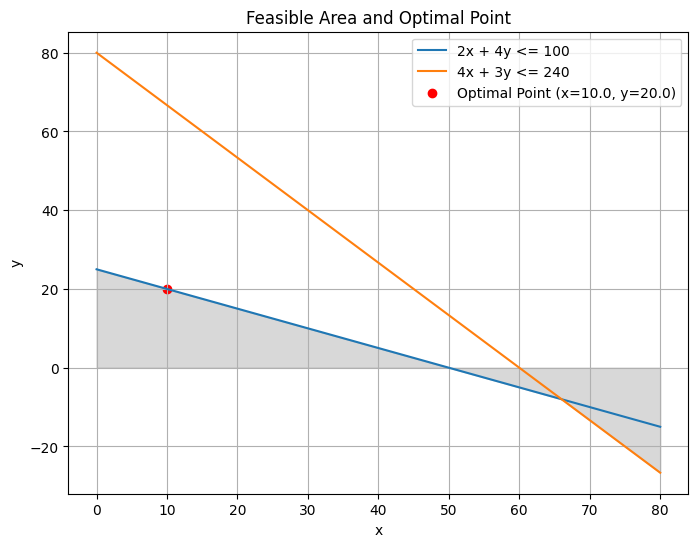

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def productoA(x):
    return (100 - 2 * x) / 4

def productoB(x):
    return (240 - 4 * x) / 3

x_vals = np.linspace(0, 80, 400)

y_vals_a = productoA(x_vals)
y_vals_b = productoB(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals_a, label='2x + 4y <= 100')
plt.plot(x_vals, y_vals_b, label='4x + 3y <= 240')

plt.fill_between(x_vals, np.minimum(y_vals_a, y_vals_b), color='gray', alpha=0.3)

optimal_x = pulp.value(x)
optimal_y = pulp.value(y)
plt.scatter(optimal_x, optimal_y, color='red', label='Optimal Point (x={}, y={})'.format(optimal_x, optimal_y))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Area and Optimal Point')
plt.legend()
plt.grid()
plt.show()



![Prompt 2.1.png](<attachment:Prompt 2.1.png>)
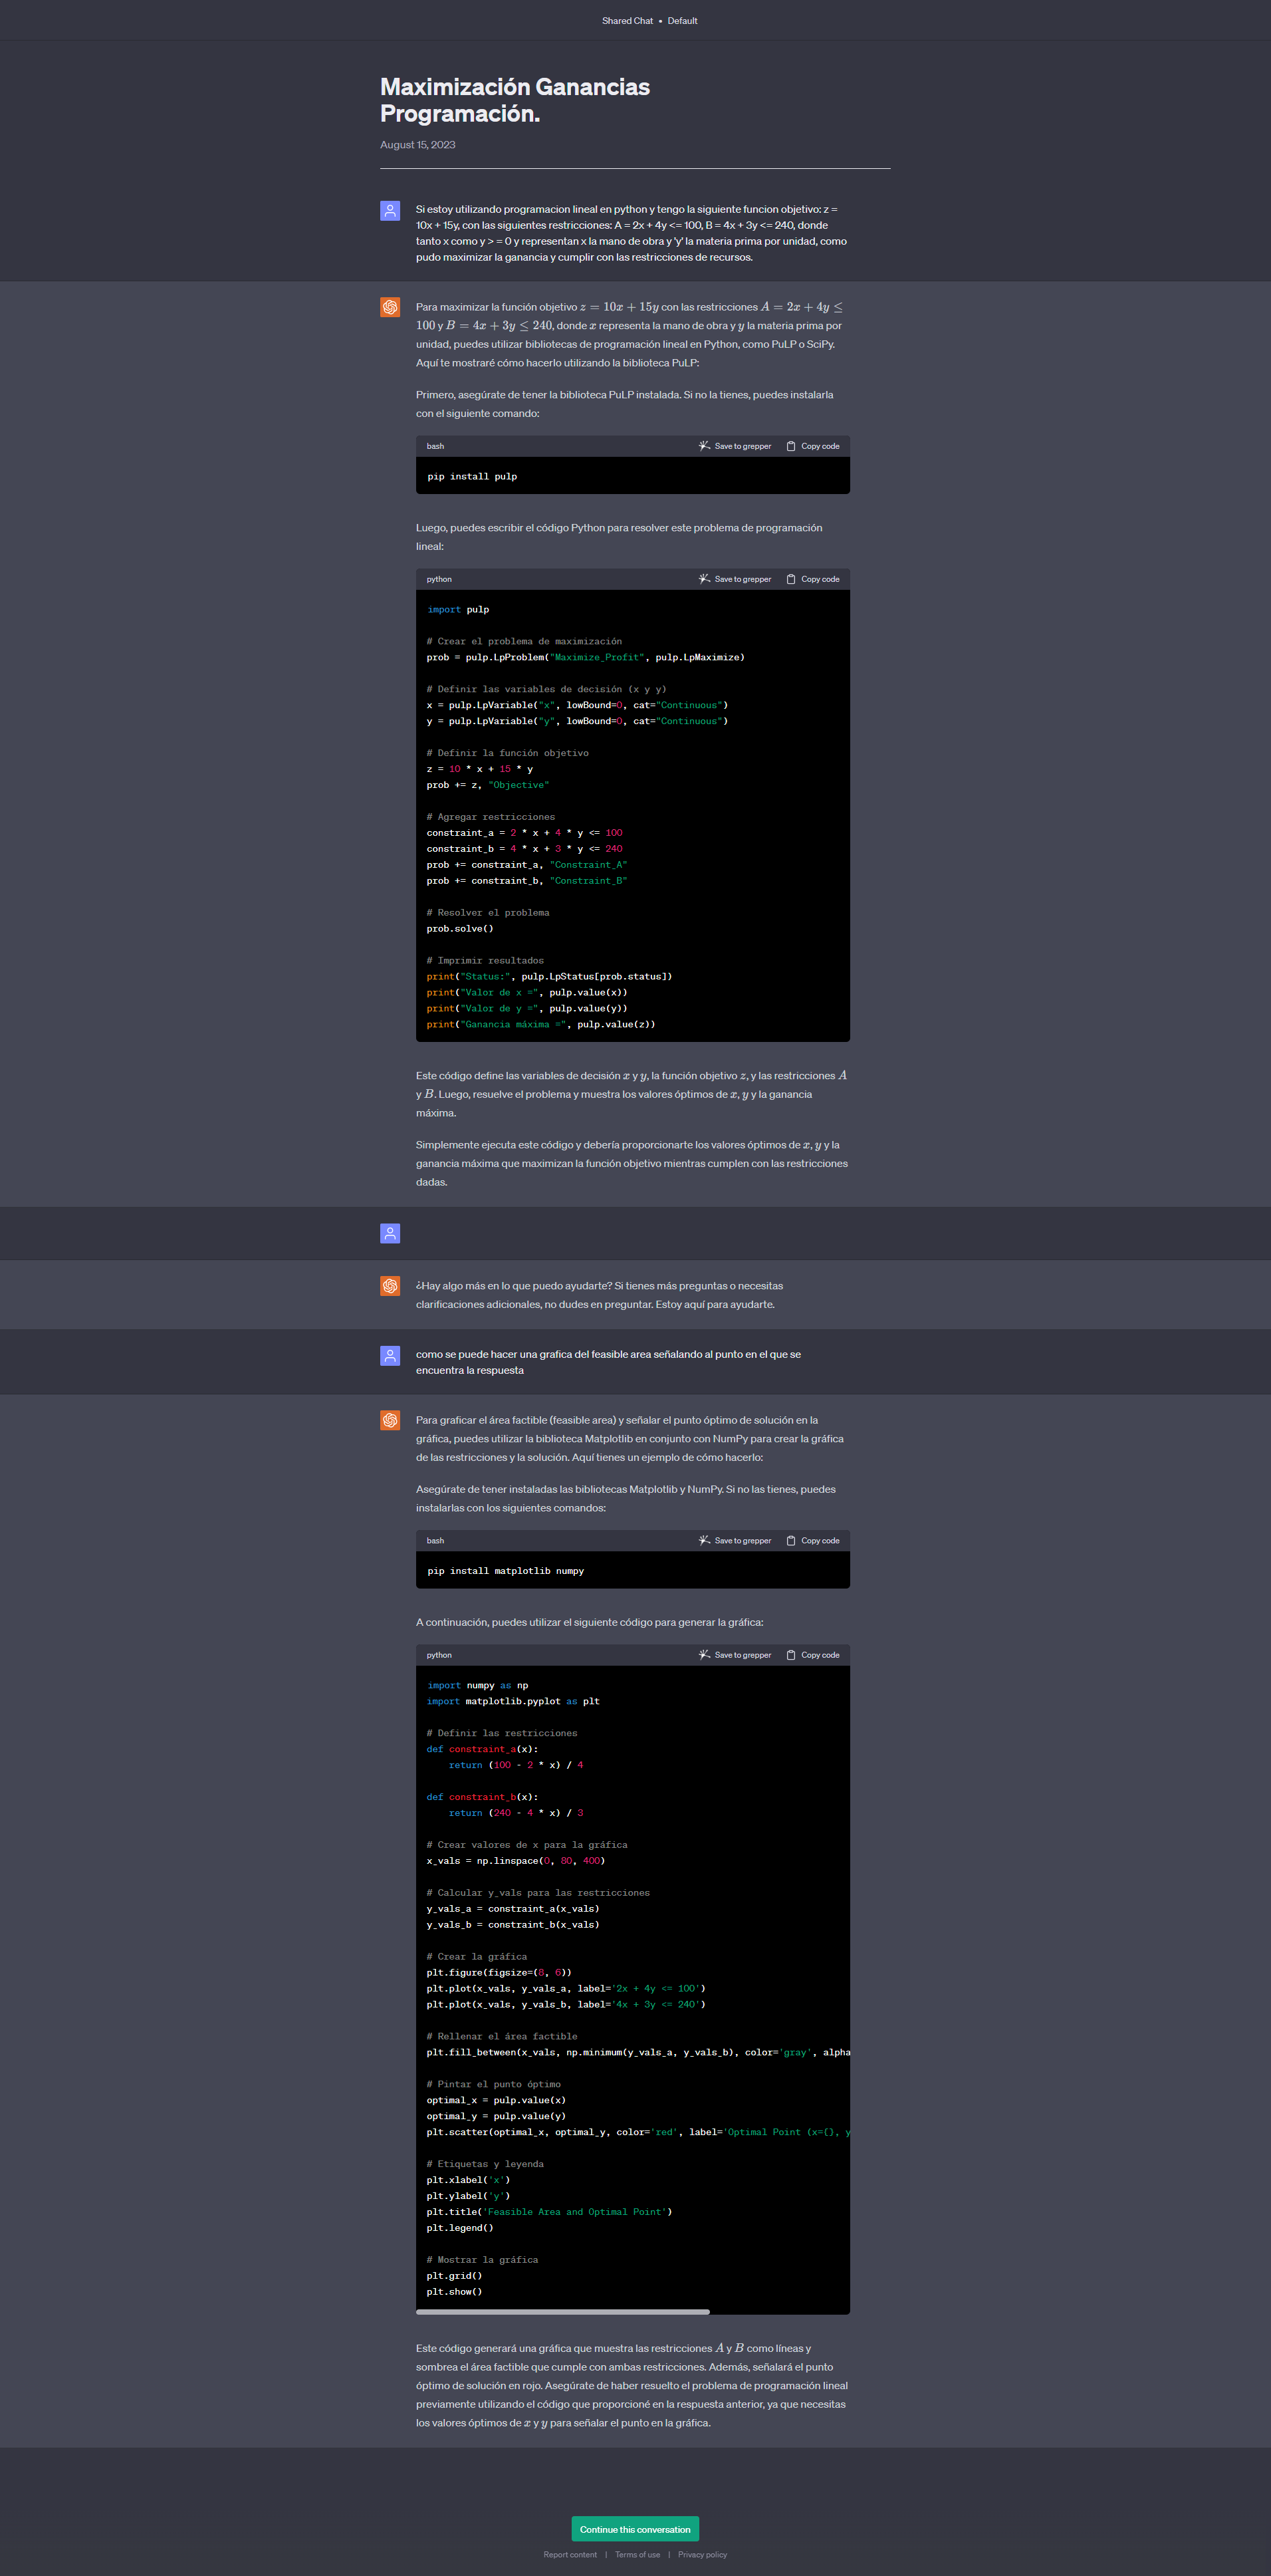

## Ejercicio 2.2
Está administrando la asignación de recursos en un proyecto que involucra tres tareas: Tarea A, Tarea B y Tarea C.
Cada tarea requiere una cantidad diferente de tiempo y personal para completarse. Su objetivo es asignar recursos
a estas tareas de una manera que maximice la ganancia total y satisfaga las restricciones del proyecto. Usted sabe
lo siguiente
* Tarea A:
    * Requiere 2 horas de trabajo y 1 personal
    * Produce una ganancia de $ 1500 al finalizar
* Tarea B:
    * Requiere 3 horas de trabajo y 2 personas
    * Produce una ganancia de $ 2500 al finalizar
* Tarea C:
    * Requiere 5 horas de trabajo y 3 personas
    * Produce una ganancia de $ 4000 al finalizar
Tiene un total de 15 horas de trabajo y 10 personas disponibles. Formule esto como un problema de programación
lineal para maximizar la ganancia total respetando las restricciones de recursos. Resuelva el problema y determine
la asignación óptima de recursos para cada tarea. Escriba un script en Python o en otro lenguaje de programación
de su preferencia y responda
1. Escriba la fórmula de la función que debe maximizar
2. Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad
3. Determine las cantidades de asignación óptima. Interprete el resultado
4. ¿Podría dibujar la feasible region? De ser sí, ¿Cómo? De ser no, ¿por qué?

In [32]:
import pulp

prob = pulp.LpProblem("Maximizar_Ganancia", pulp.LpMaximize)

x_A = pulp.LpVariable('x_A', lowBound=0, cat='Integer')
x_B = pulp.LpVariable('x_B', lowBound=0, cat='Integer')
x_C = pulp.LpVariable('x_C', lowBound=0, cat='Integer')


prob += 1500*x_A + 2500*x_B + 4000*x_C, "Ganancia Total"
prob += 2*x_A + 3*x_B + 5*x_C <= 15, "Restricción de Horas"
prob += x_A + 2*x_B + 3*x_C <= 10, "Restricción de Personal"

prob.solve()

print("Asignacion optima tarea A:", x_A.varValue)
print("Asignacion optima tarea A:", x_B.varValue)
print("Asignacion optima tarea C:", x_C.varValue)
print("Ganancia maxima:", value(prob.objective))


Asignacion optima tarea A: 0.0
Asignacion optima tarea A: 5.0
Asignacion optima tarea C: 0.0
Ganancia maxima: 12500.0


Al observar los resultados se puede ver que tanto la tarea A como la tarea C tienen un valor de 0. Esto quiere decir que estas tareas no se realizan ni una sola vez para alcanzar la solución óptima. Por otro lado el valor de B es 5 lo que quiere decir que esta tarea se realiza 5 veces para alcanzar la solución óptima.

La feasible region es posible de graficar. Sin embargo al ser tres variables se necesitaria una grafica en 3D, lo cual no es posible en este caso. Para lograr graficar la feasible region se debe reducir la cantidad de variables a dos, lo cual se logra con estableciendo el valor de una de las variables a 0. 

## Ejercicio 2.3
Usted es gerente de producción en una empresa que fabrica tres tipos de productos: Producto A, Producto B y
Producto C. Cada producto requiere diferentes cantidades de materias primas, mano de obra y tiempo de máquina para producir. Tiene recursos limitados para materias primas, mano de obra y tiempo de máquina, y desea
optimizar la combinación de producción para maximizar las ganancias de su empresa. Usted sabe lo siguiente:
* Producto A:
    * Requiere 2 unidades de materias primas, 3 horas de mano de obra y 4 horas de tiempo de máquina
    * Se vende a $300 por unidad
    * Cada unidad tiene un costo de $100
* Producto B:
    * Requiere 1 unidad de materia prima, 2 horas de mano de obra y 3 horas de tiempo de máquina
    * Se vende a $ 500 por unidad
    * Cada unidad tiene un costo de $200
* Producto C:
    * Requiere 3 unidades de materias primas, 4 horas de mano de obra y 6 horas de tiempo de máquina
    * Se vende a $700 por unidad
    * Cada unidad tiene un costo de $200
Usted tiene 100 unidades de materias primas, 120 horas de mano de obra y 150 horas de tiempo de máquina
disponibles. Formule esto como un problema de programación lineal y resuélvalo para encontrar las cantidades de
producción óptimas para obtener el máximo beneficio.
Escriba un script en Python o en otro lenguaje de programación de su preferencia y responda
1. Escriba la fórmula de la función que debe maximizar
$$\ 
z = 300x_A + 500x_B + 700x_C - (100x_A - 200x_B - 200x_C)\\
z = 200x_A + 300x_B + 500x_C
$$

2. Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad
$$\
Materia \ prima : 2x_A + x_B + 3x_C \leq 100\\
Mano \ de \ obra : 3x_A + 2x_B + 4x_C \leq 120\\
Tiempo \ de \ maquina : 4x_A + 3x_B + 6x_C \leq 150\\
$$
3. Determine las cantidades de producción óptimas y el máximo beneficio. Interprete el resultado

In [41]:
from pulp import *

prob = LpProblem("Maximizar_Ganancia", LpMaximize)

x_A = LpVariable('x_A', lowBound=0, cat='Integer')
x_B = LpVariable('x_B', lowBound=0, cat='Integer')
x_C = LpVariable('x_C', lowBound=0, cat='Integer')

prob += 200*x_A + 300*x_B + 500*x_C, "Funcion objetivo"

prob += 2*x_A + x_B + 3*x_C <= 100, "Materia prima"
prob += 3*x_A + 2*x_B + 4*x_C <= 120, "Mano de Obra"
prob += 4*x_A + 3*x_B + 6*x_C <= 150, "Tiempo de maquina"

prob.solve()

print("Cantidad del producto A = ", x_A.varValue)
print("Cantidad del producto B = ", x_B.varValue)
print("Cantidad del producto C = ", x_C.varValue)
print("Maximo beneficio:", value(prob.objective))


Cantidad del producto A =  0.0
Cantidad del producto B =  50.0
Cantidad del producto C =  0.0
Maximo beneficio: 15000.0


Se puede observar que para obtener el máximo beneficio se deben producir 50 unidades del producto B, mientras que ninguna del producto A o C. El beneficio máximo es de 1500.